# Know Your Consumer: Predictive Modeling for Online Shopping Outcomes

Halladay Kinsey, Vivian Perng, Daniel Grant

# Exploratory Data Analysis

### Thoughts after first look:


*  No missing vals - too simple? (add models)
*  High class imbalance
*  Oversampling method for balancing dataset (paper)

### Model Thoughts


*   RF
*   SVM
*   MLP
*   XGBoost
*   Simple DT?
*   Models for relationships between specific variables to add some complexity to the data
*   Sampling models



*  Paper used Gradient Boosting Classification model & oversampling for high accuracy





In [1]:
# Importing necessary libraries
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/AAI510: Final Project/online_shoppers_intention.csv'

# Loading data
df = pd.read_csv(file_path)

# Checking to ensure proper loading
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

### Missing Value Check

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)

Missing Values in Dataset:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Overall Revenue Distribution

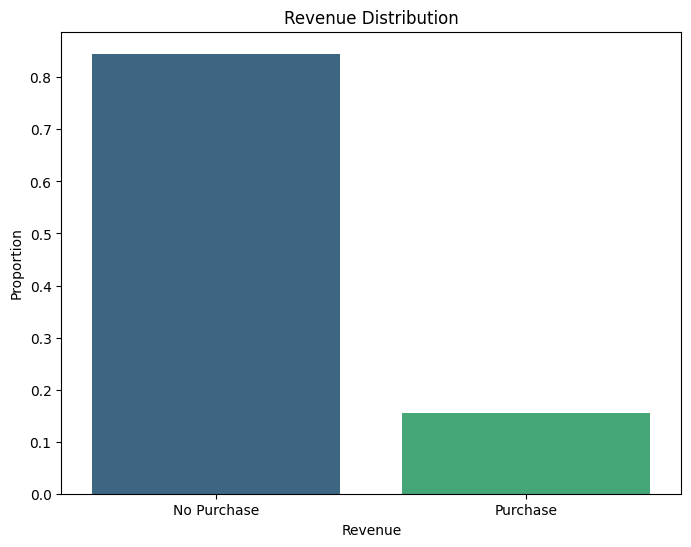

In [5]:
# Plotting distribution of Revenue
revenue_distribution = df['Revenue'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_distribution.index, y=revenue_distribution.values, palette='viridis')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['No Purchase', 'Purchase'])
plt.show()

## Numerical Columns

### Summary Statistics

In [6]:
# Summary statistics for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
summary_statistics = df[numerical_columns].describe()
print("Summary Statistics of Numerical Columns:\n", summary_statistics)

Summary Statistics of Numerical Columns:
        Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25

### Correlation

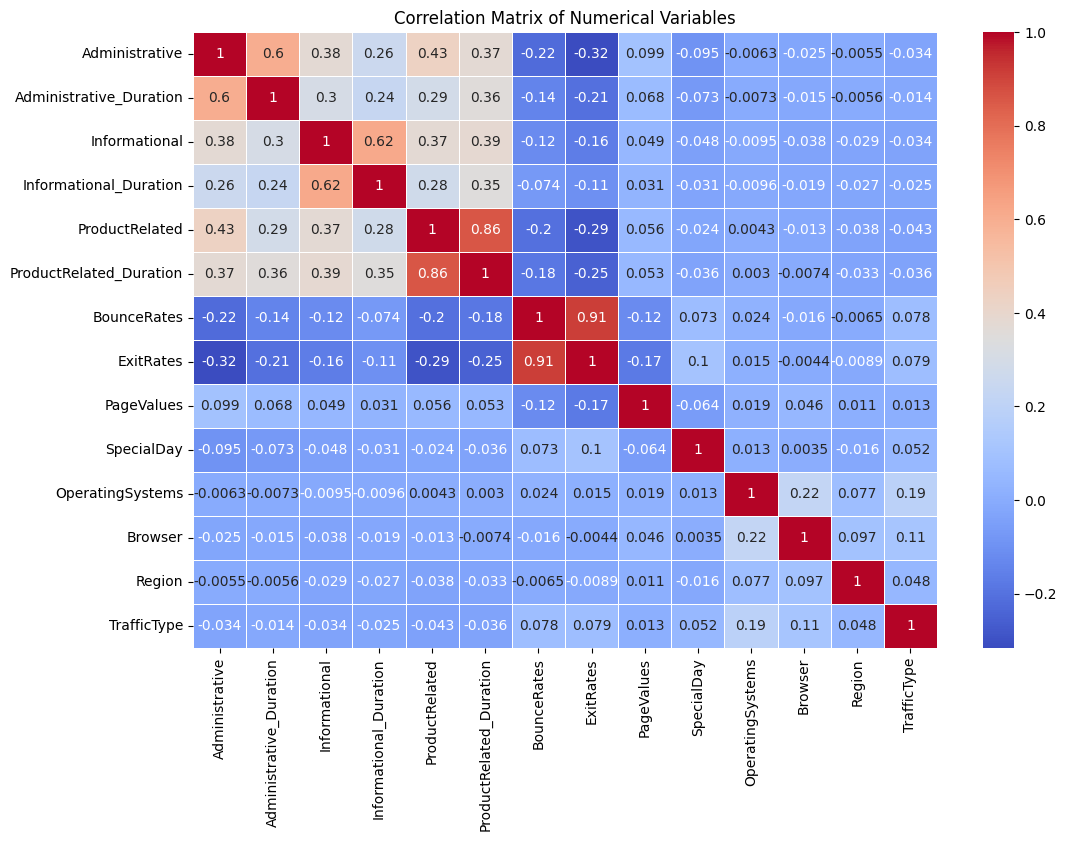

In [7]:
# Correlation matrix & heatmap
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Most correlated variables

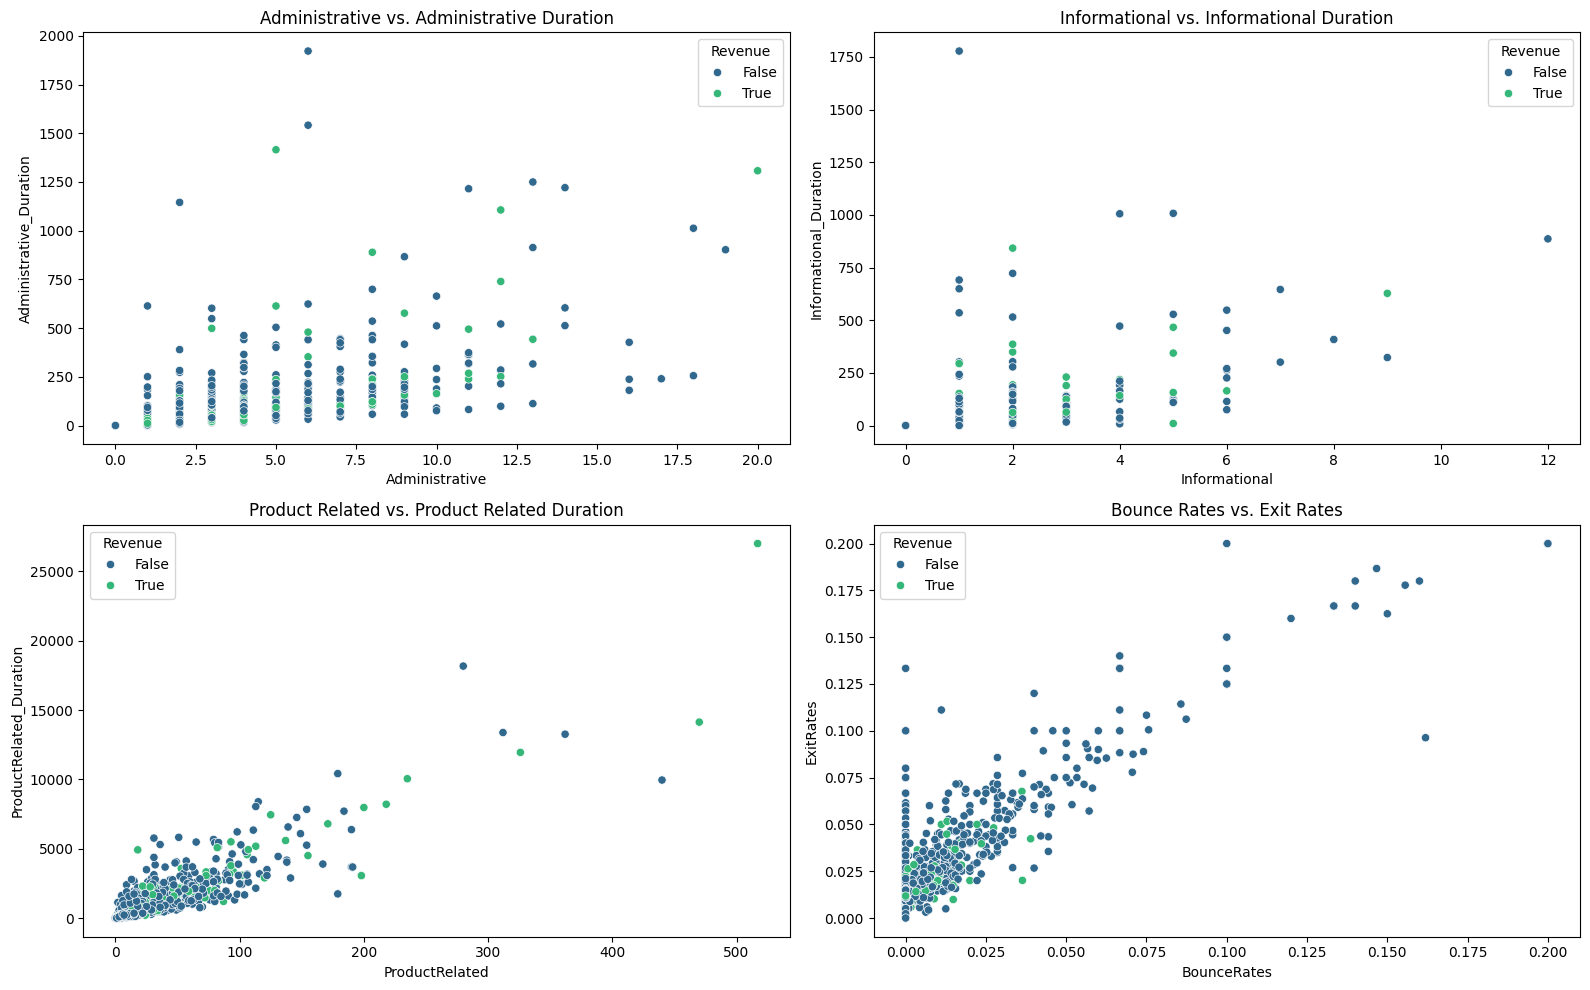

In [8]:
# Sampling data for overfitting
sampled_df = df.sample(1000, random_state=1)

plt.figure(figsize=(16, 10))

# Administrative vs. Administrative Duration
plt.subplot(2, 2, 1)
sns.scatterplot(data=sampled_df, x='Administrative', y='Administrative_Duration', hue='Revenue', palette='viridis')
plt.title('Administrative vs. Administrative Duration')

# Informational vs. Informational Duration
plt.subplot(2, 2, 2)
sns.scatterplot(data=sampled_df, x='Informational', y='Informational_Duration', hue='Revenue', palette='viridis')
plt.title('Informational vs. Informational Duration')

# Product Related vs. Product Related Duration
plt.subplot(2, 2, 3)
sns.scatterplot(data=sampled_df, x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', palette='viridis')
plt.title('Product Related vs. Product Related Duration')

# Bounce Rates vs. Exit Rates
plt.subplot(2, 2, 4)
sns.scatterplot(data=sampled_df, x='BounceRates', y='ExitRates', hue='Revenue', palette='viridis')
plt.title('Bounce Rates vs. Exit Rates')

plt.tight_layout()
plt.show()

### Outlier Check

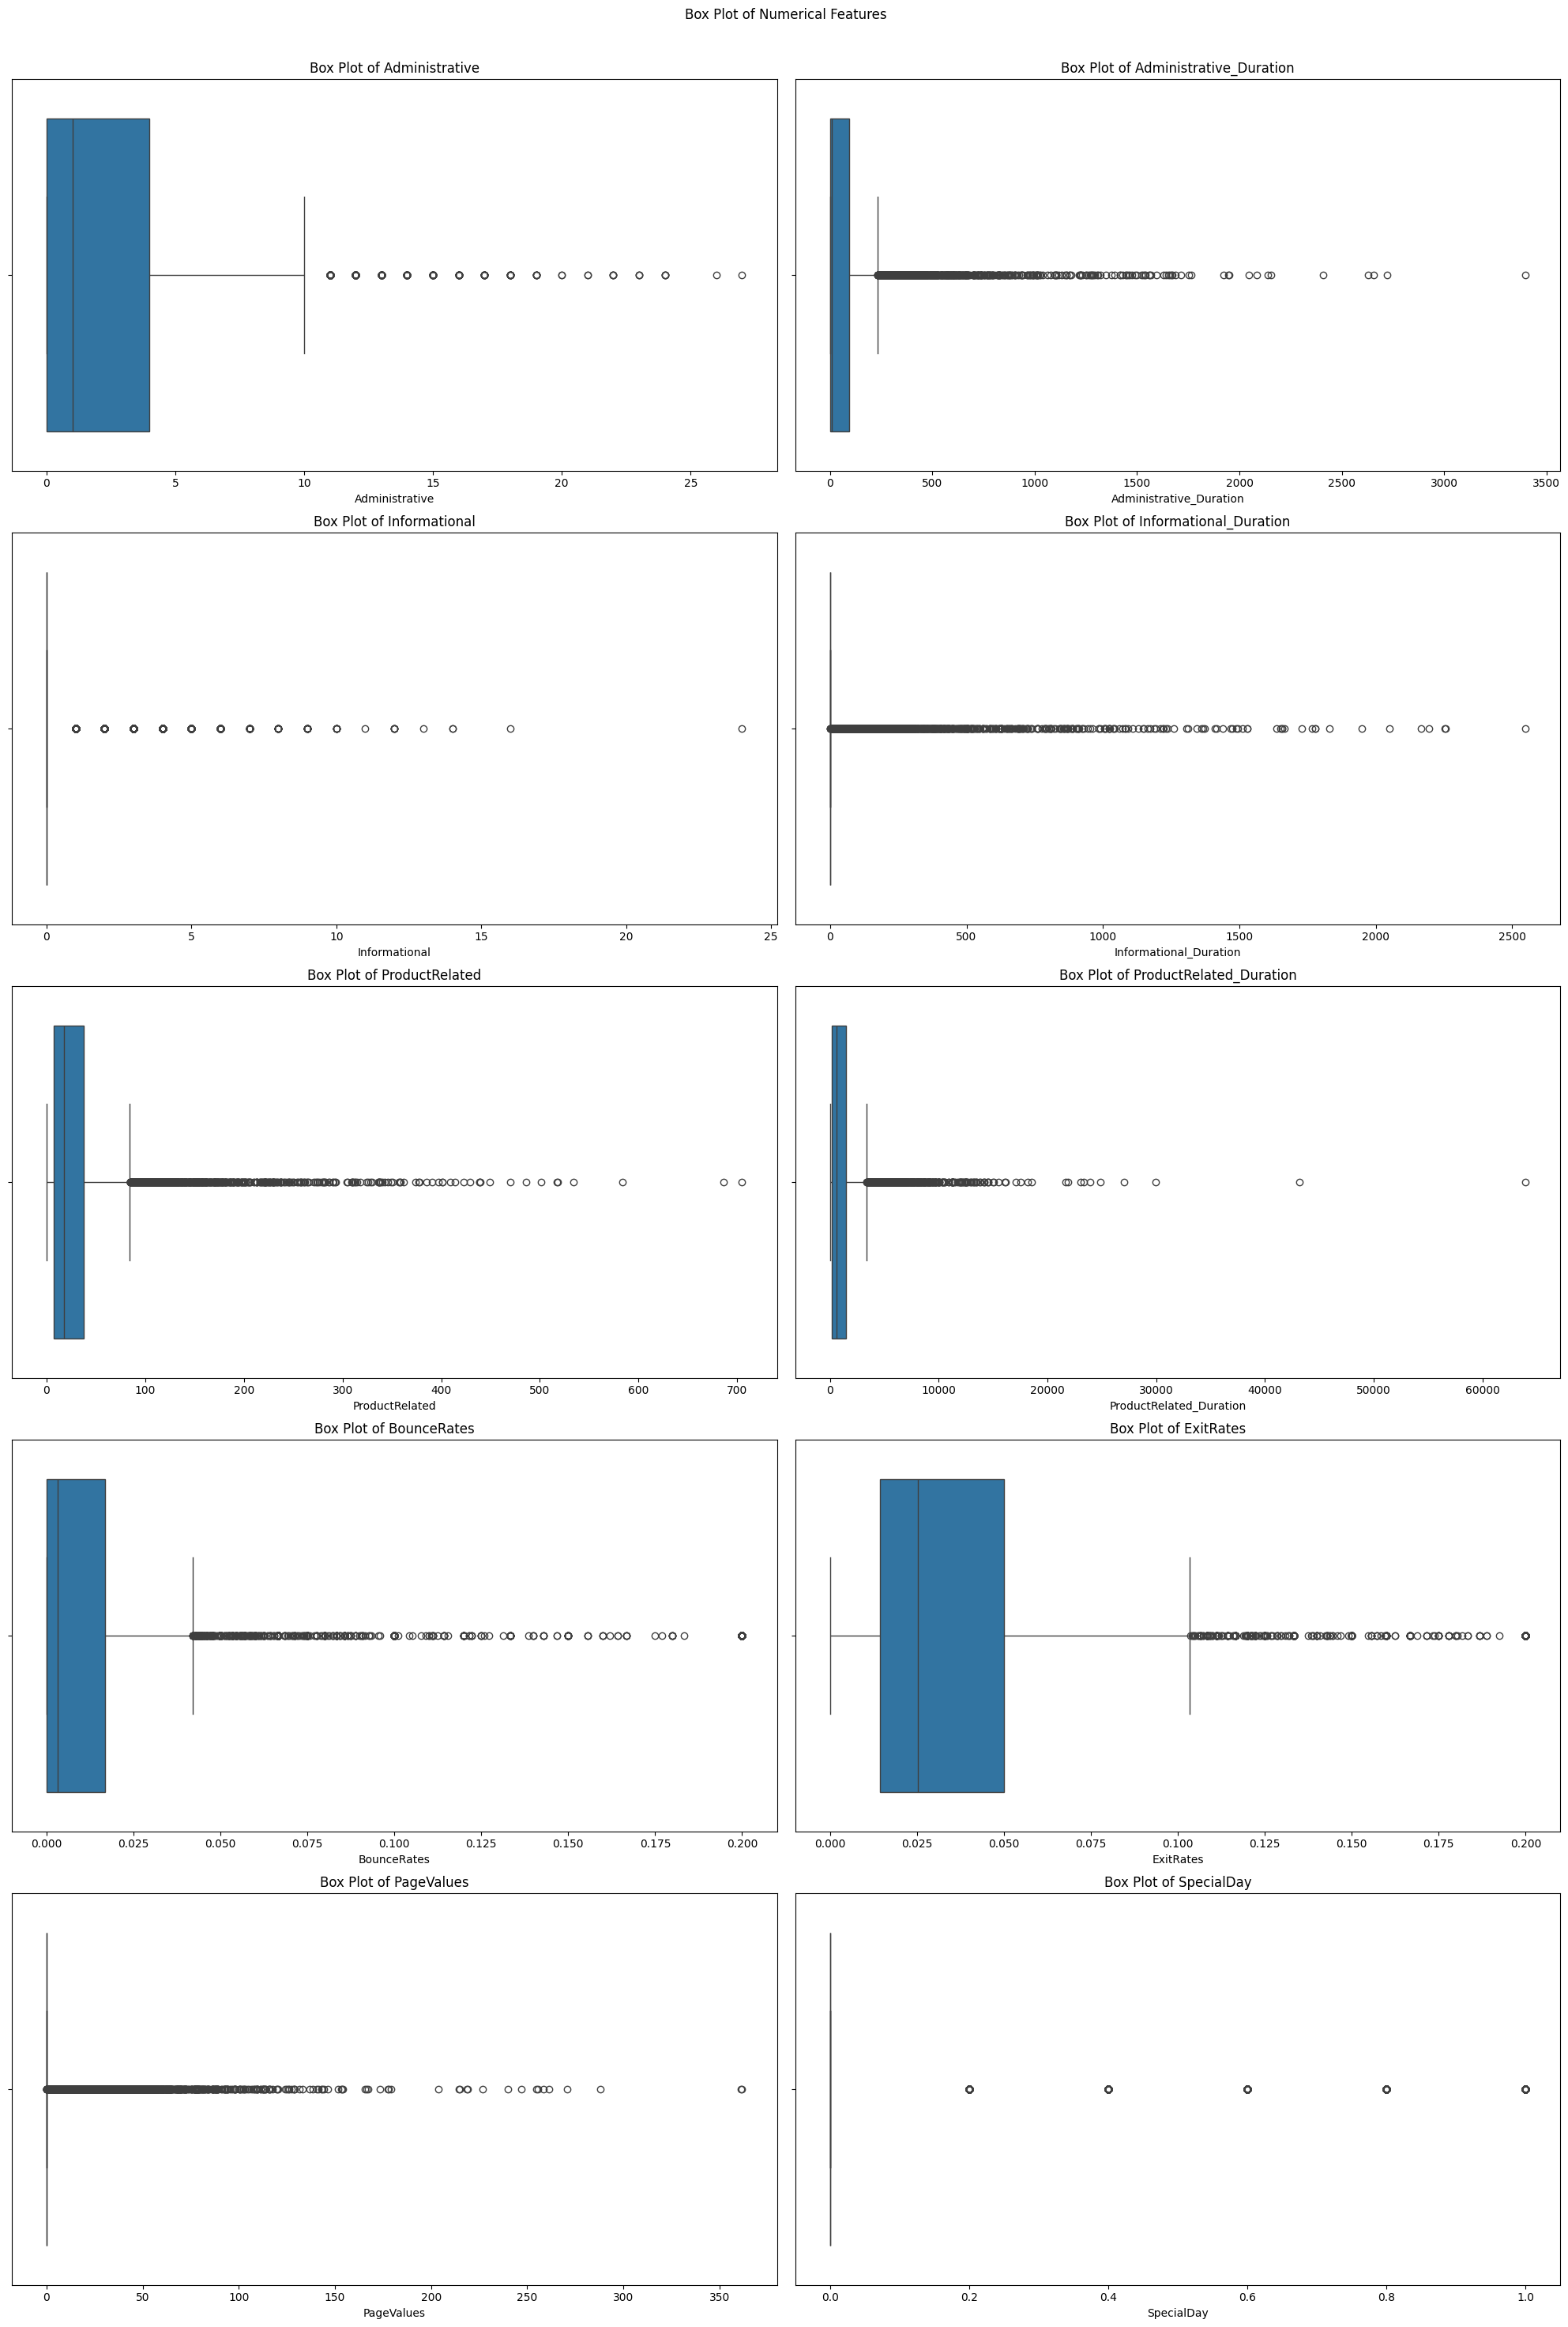

In [9]:
# List of numerical columns to plot
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

fig, axes = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Box Plot of Numerical Features')

# Iterating over numerical columns
for col, ax in zip(numerical_cols, axes.flatten()):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Distribution of Numerical Variables

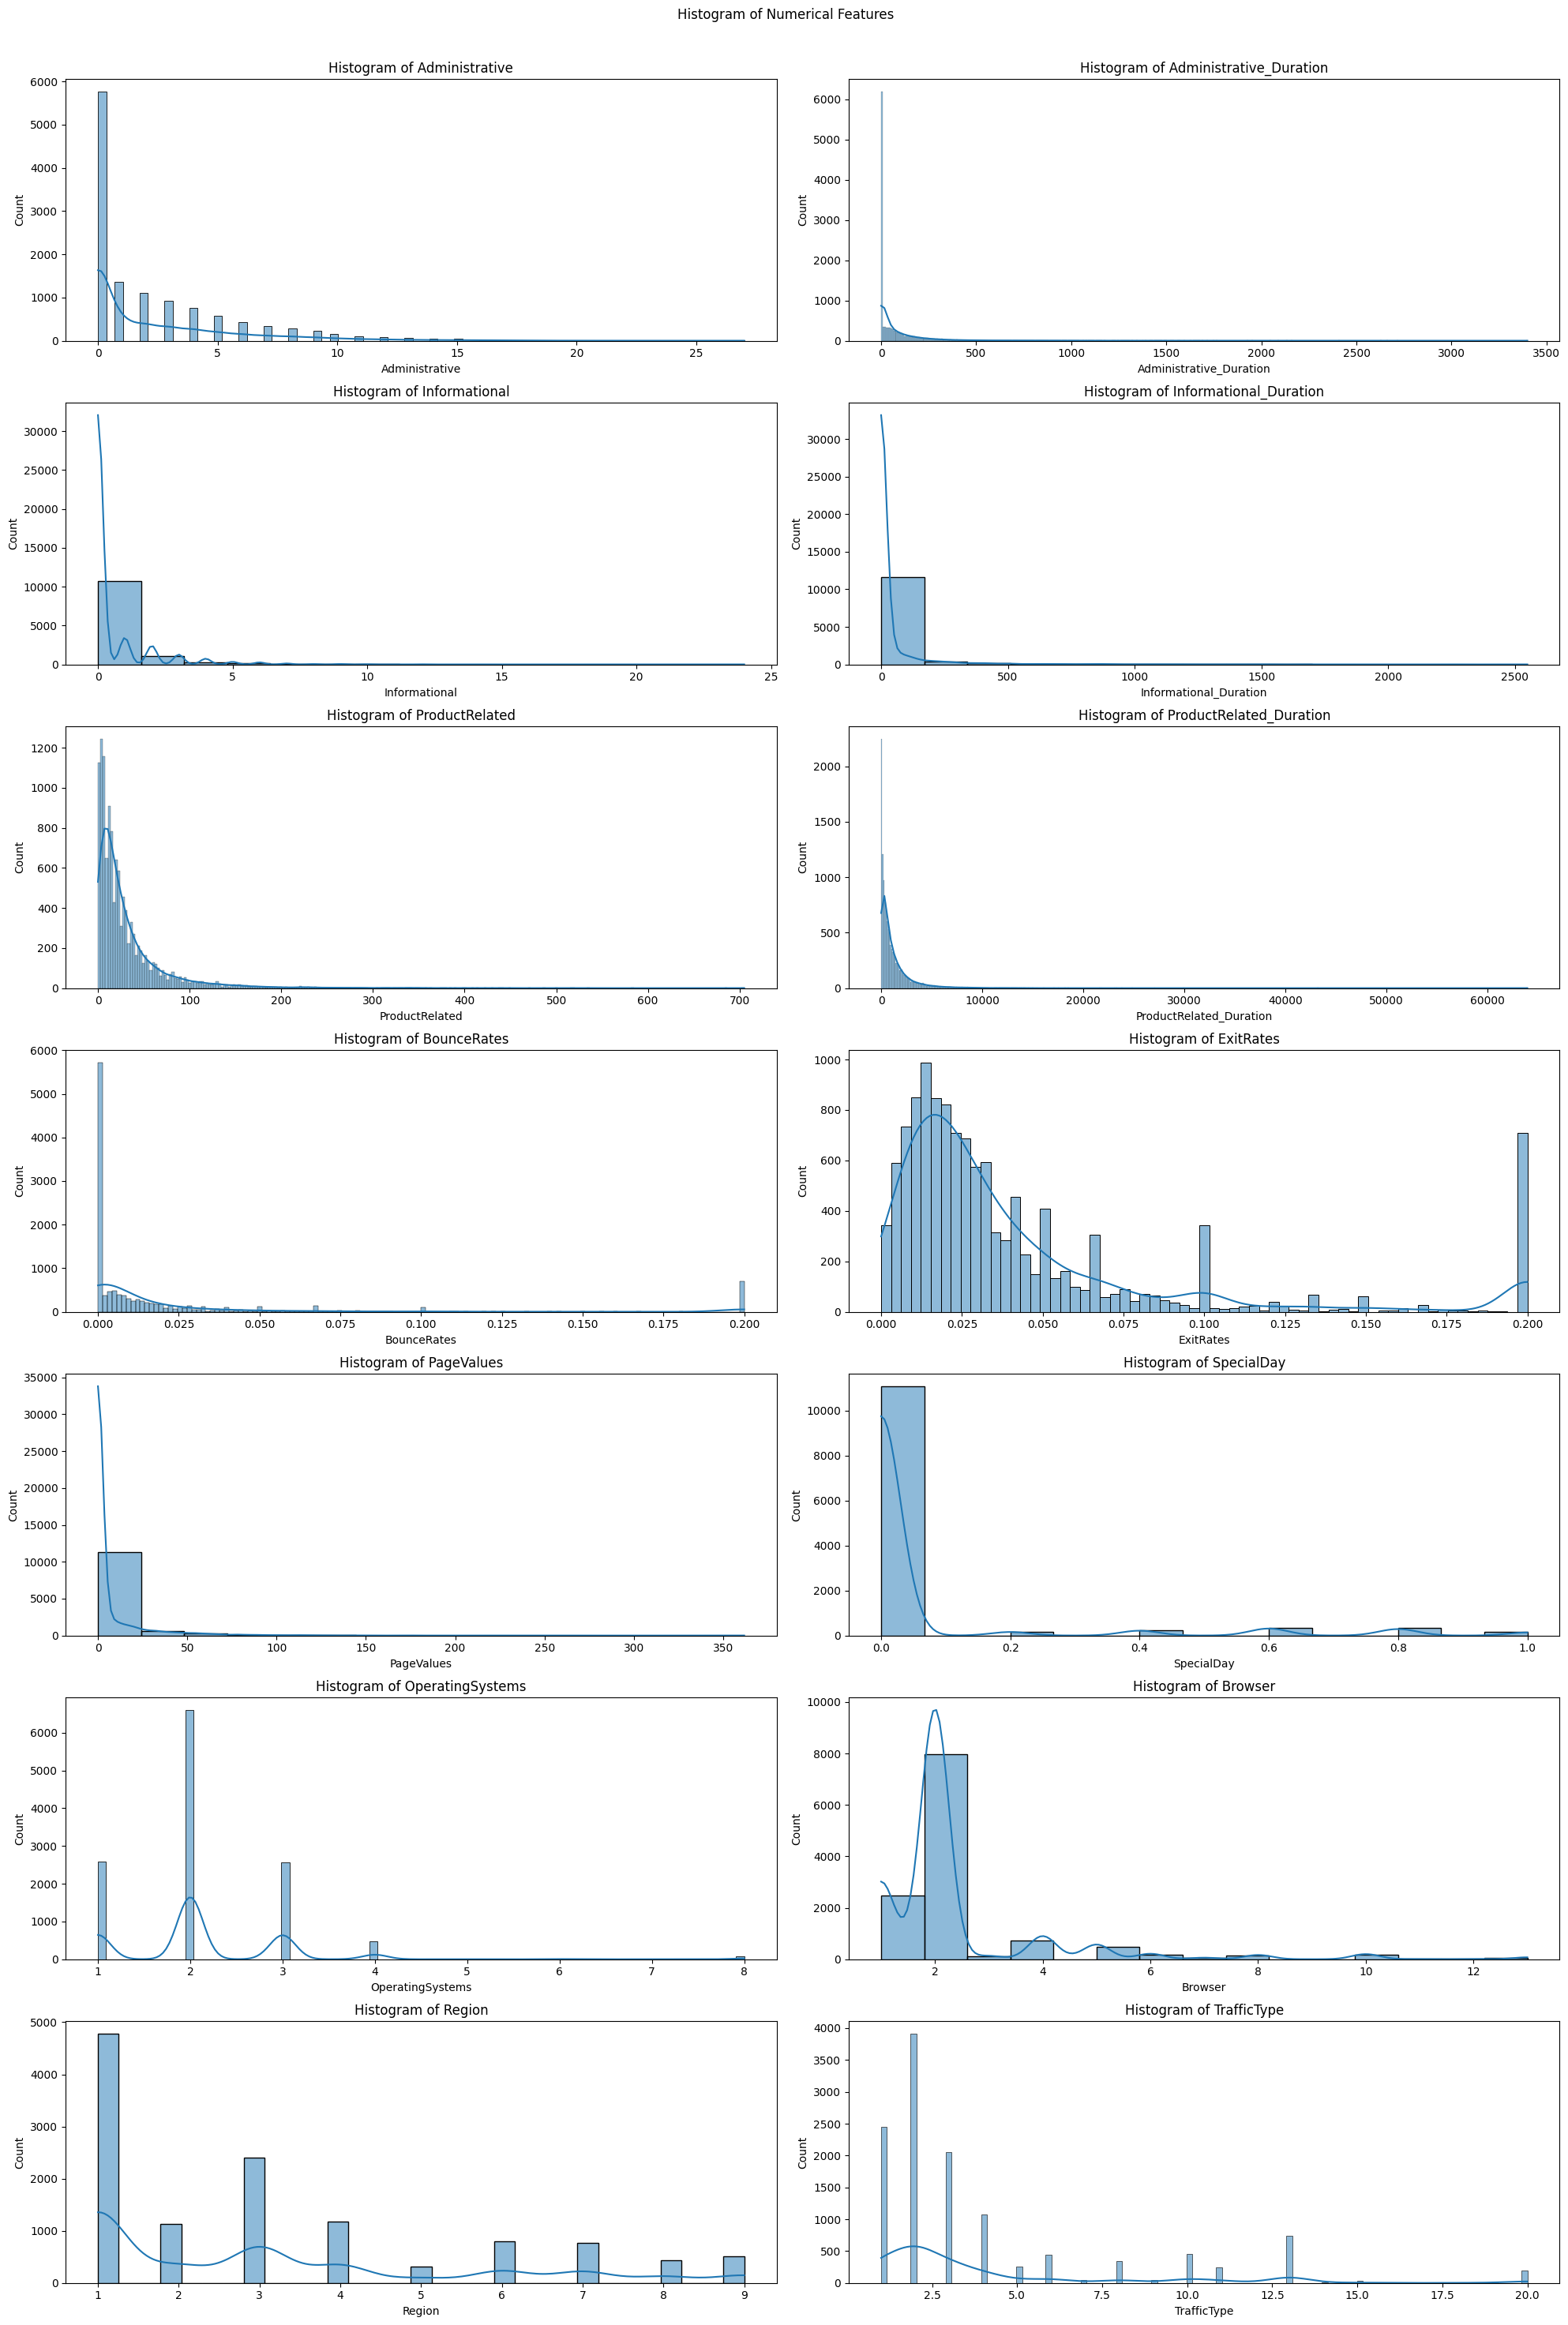

In [10]:
# List of all numerical columns
numerical_list = numerical_columns.tolist()

fig, axes = plt.subplots(7, 2, figsize=(20, 30))
fig.suptitle('Histogram of Numerical Features')

# Iterating over numerical columns
for col, ax in zip(numerical_list, axes.flatten()):
    sns.histplot(data=df, x=col, ax=ax, kde=True)
    ax.set_title(f'Histogram of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Categorical Columns

### Distribution

In [11]:
# Distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
categorical_distributions = {}
for col in categorical_columns:
    categorical_distributions[col] = df[col].value_counts()
for col, value_counts in categorical_distributions.items():
    print(f"Distribution of {col}:\n{value_counts}\n")
# categorical_distributions = df[categorical_columns].apply(lambda x: x.value_counts())
# print("Distribution of Categorical Variables:\n", categorical_distributions)

Distribution of Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Distribution of VisitorType:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Distribution of Weekend:
Weekend
False    9462
True     2868
Name: count, dtype: int64

Distribution of Revenue:
Revenue
False    10422
True      1908
Name: count, dtype: int64



### Distribution by Revenue

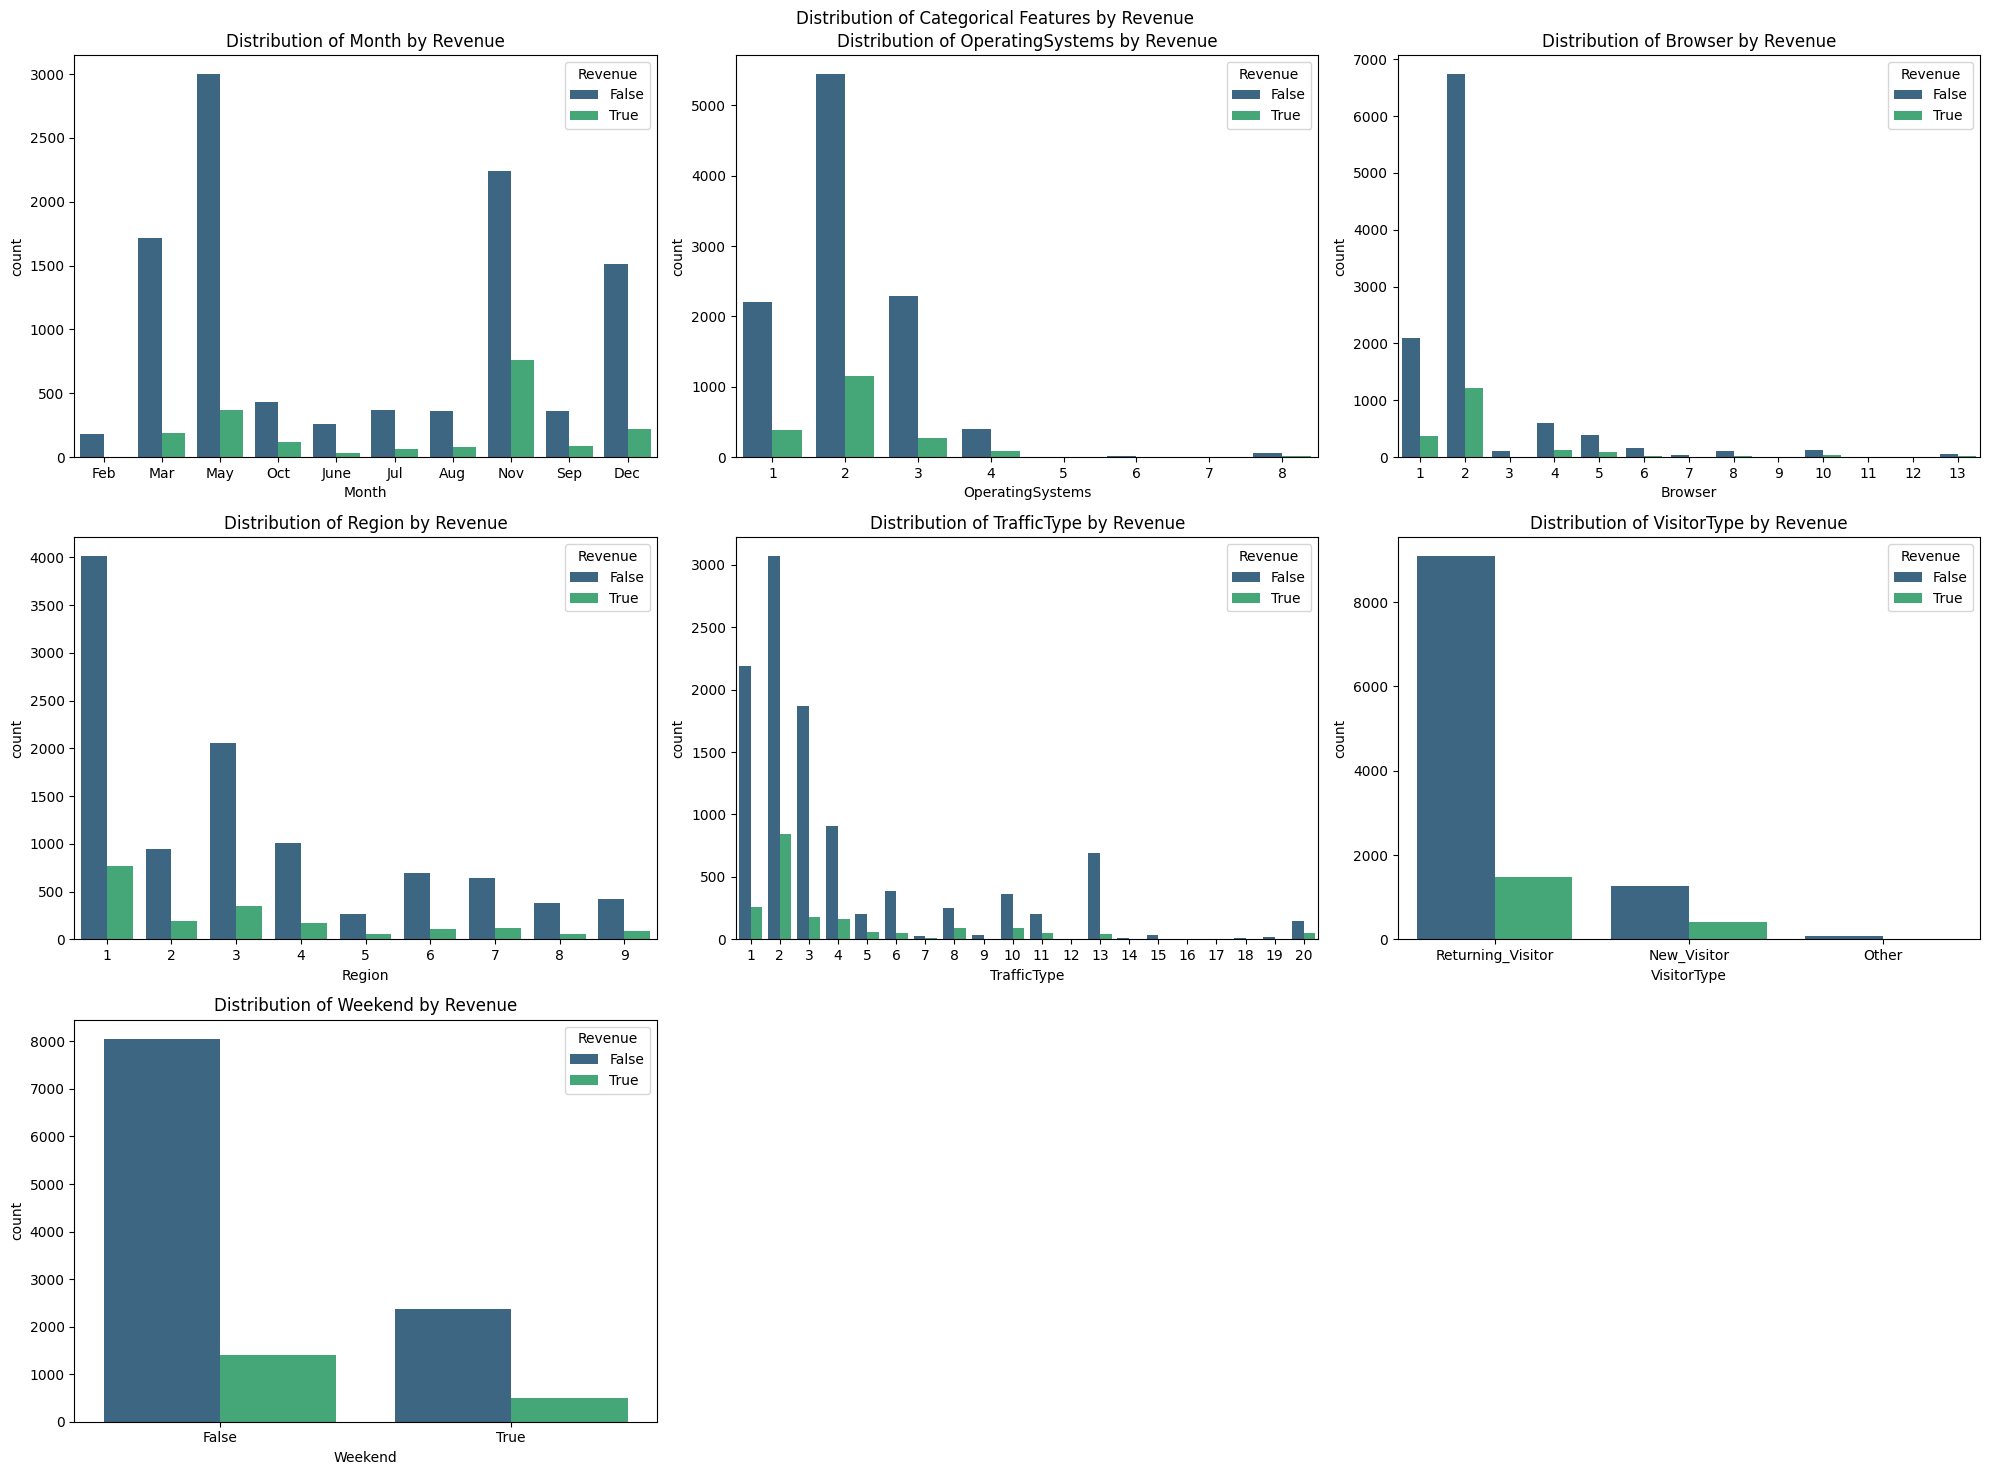

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Distribution of Categorical Features by Revenue')

# Categorical columns
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Iterating over categorical columns
for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(data=df, x=col, hue='Revenue', palette='viridis', ax=ax)
    ax.set_title(f'Distribution of {col} by Revenue')
    ax.legend(title='Revenue', loc='upper right')

# Removing empty subplots
for i in range(len(categorical_cols), 9):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

New Features

In [13]:
# seasons and quarters
season_mapping = {
    'Jan': 'Winter', 'Feb': 'Winter', 'Mar': 'Spring',
    'Apr': 'Spring', 'May': 'Spring', 'Jun': 'Summer',
    'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Fall',
    'Oct': 'Fall', 'Nov': 'Fall', 'Dec': 'Winter'
}
df['Season'] = df['Month'].map(season_mapping)

quarter_mapping = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}
df['Quarter'] = df['Month'].map(quarter_mapping)

df['IsHolidayMonth'] = df['Month'].apply(lambda x: 1 if x in ['Nov', 'Dec'] else 0) # thanksgiving and christmas months only

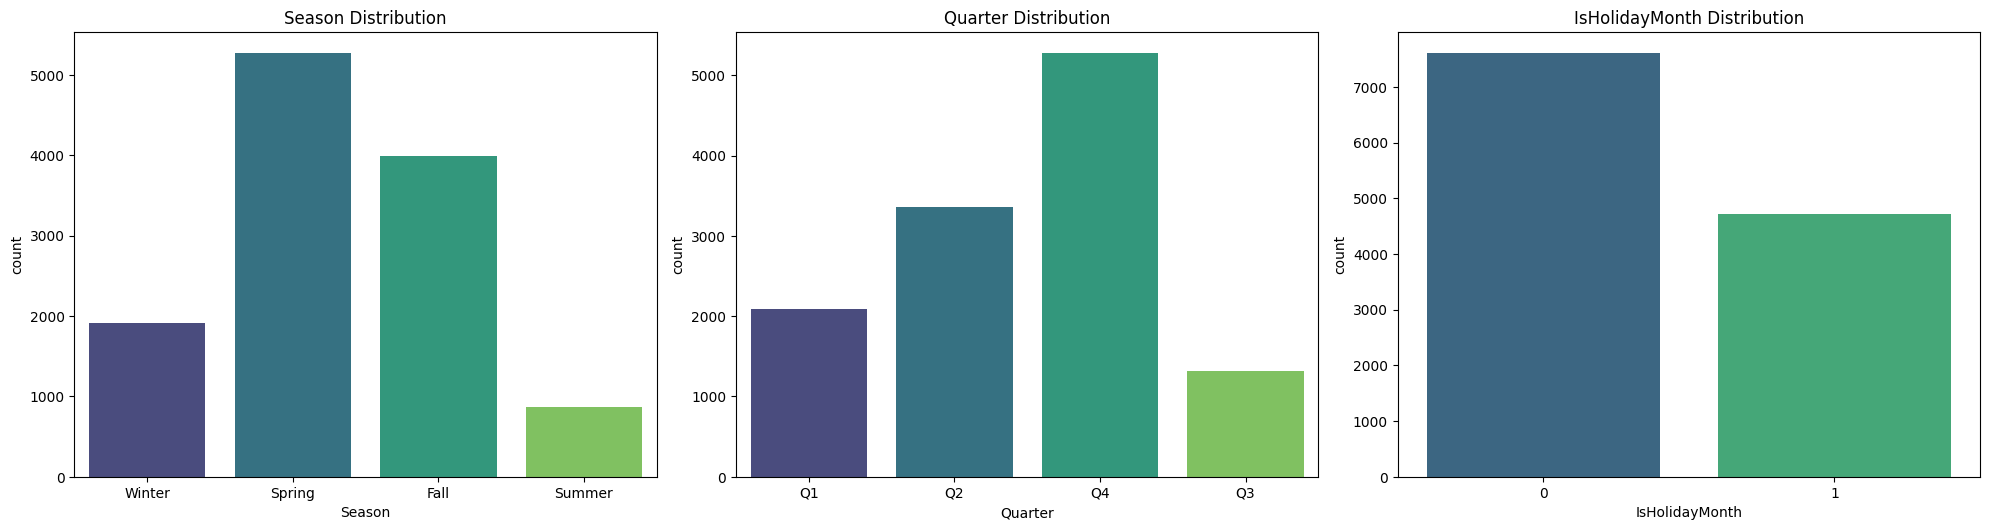

In [14]:
# distribution plots
plt.figure(figsize=(20, 10))

# seasons
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Season', palette='viridis')
plt.title('Season Distribution')

# quarters
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Quarter', palette='viridis')
plt.title('Quarter Distribution')

# IsHolidayMonth
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='IsHolidayMonth', palette='viridis')
plt.title('IsHolidayMonth Distribution')

plt.tight_layout()
plt.show()

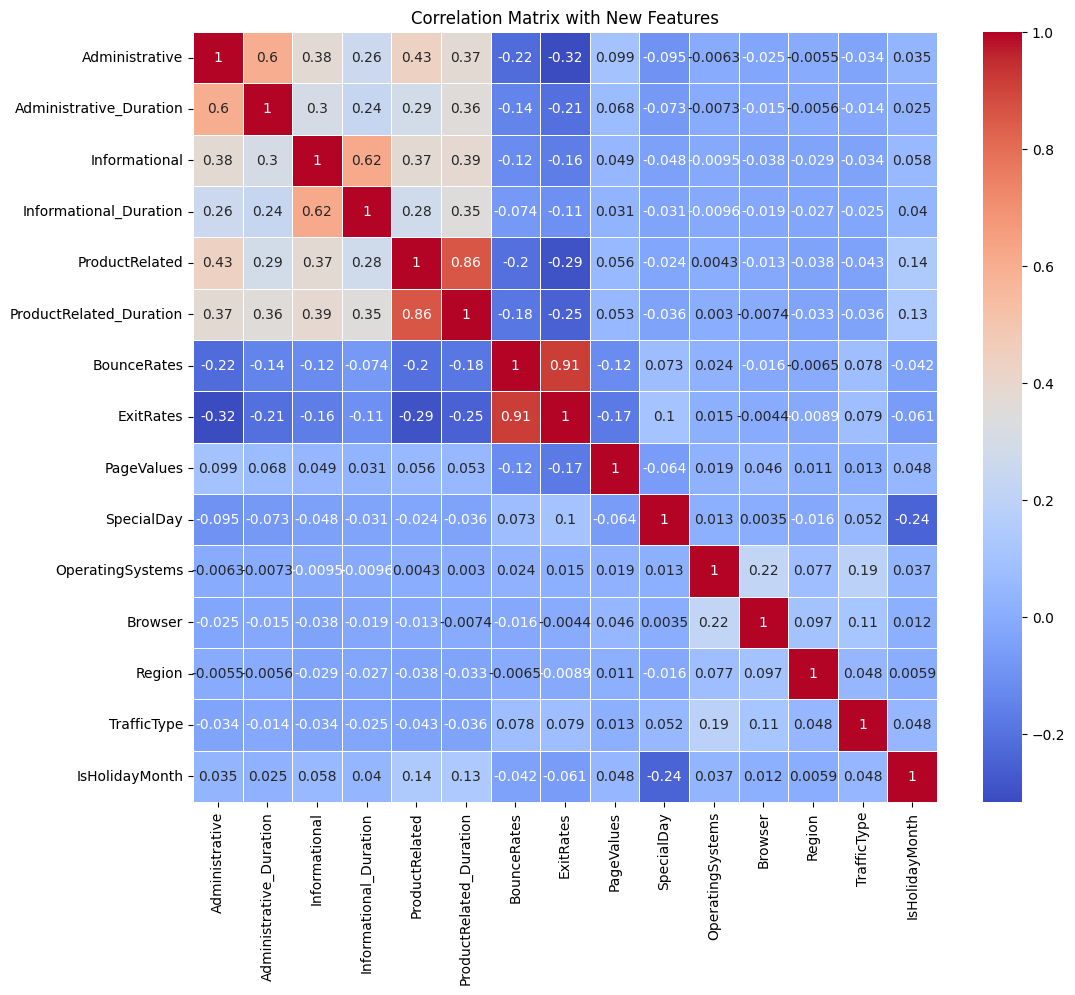

In [15]:
# correlation w/ new features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with New Features')
plt.show()

## Findings from Visualizations

### Correlation Matrix with New Features
- **BounceRates** and **ExitRates** are highly correlated (0.91).
- **ProductRelated** and **ProductRelated_Duration** also show a strong correlation (0.86).
- Most other features have low to moderate correlations.

### Season, Quarter, and IsHolidayMonth Distributions
- Spring has the highest count, followed by Fall, Winter, and Summer.
- Q4 and Q2 have the highest counts

### Distribution of Categorical Features by Revenue
- **Month**: May and November have the highest number of purchases.
- **Operating Systems**: Most purchases are from users using Operating System 1, followed by OS 2 and OS 3.
- **Browser**: Browser 2 has the highest number of purchases, followed by Browser 1.
- **Region**: Region 1 has the highest number of purchases.
- **TrafficType**: Traffic type 2 has the highest number of purchases.
- **VisitorType**: Returning visitors have a significantly higher number of purchases compared to new visitors.

### Histogram of Numerical Features
- Most features, like **Administrative, Informational, ProductRelated**, show a right-skewed distribution.
- **BounceRates** and **ExitRates** are concentrated at the lower end with a few high values.
- **PageValues** is also right-skewed with most values near zero.

### Box Plots of Numerical Features
- Many features exhibit significant outliers, particularly in duration-related features (e.g., **Administrative_Duration**, **Informational_Duration**, **ProductRelated_Duration**).

### Scatter Plots
- **BounceRates vs. ExitRates** shows a strong positive correlation.
- **ProductRelated vs. ProductRelated_Duration** shows a positive correlation with a cluster of higher values.
- **Administrative vs. Administrative_Duration** and **Informational vs. Informational_Duration** show less clear patterns with some outliers.

### Key Insights
1. **BounceRates and ExitRates** are highly correlated, suggesting they might be capturing similar behavior of users leaving the site.
2. **Product-related activities** (pages viewed and time spent) are strongly correlated, which is intuitive as more product pages viewed generally mean more time spent.
3. There is a significant class imbalance with most observations not leading to purchases.
4. Certain periods (May, November) and user types (returning visitors) are associated with higher purchase rates.
5. Significant outliers in duration-related features suggest variability in user engagement.

#### Balancing Data


- Since there was a significant imbalance between purchases made and not made, let's apply SMOTE to ensure equal class representation.
- First, we need to encode our categorical variables using one-hot encoding for multiclass variables and the LabelEncoder for binary variables.

In [16]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert binary categorical variables using LabelEncoder
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

# Convert nominal categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Season', 'Quarter'], drop_first=True)

# Check the DataFrame to ensure proper encoding
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Oct  Month_Sep  \
0         0.20       0.20         0.0         0.0  ...      False      False   
1         0.00       0.10         0.0         0.0  .

In [17]:
# Separate features and target
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new class distribution
print(y_resampled.value_counts())

Revenue
0    10422
1    10422
Name: count, dtype: int64
